Detrending

In [2]:
import os
import pickle
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("../..")

from prediction.pred_utils import generate_dataset_from_graph_timeseries

In [3]:
splits = [0.35, 0.15, 0.5]

In [4]:
dataset_path = r"C:\\Users\\gabri\\Desktop\\new_thesis_project\\prediction\\NOAA\\dataset\\"
timeseries_data_path = dataset_path + "original/NOA_109_data.npy"
differenced_timeseries_results_path = dataset_path + "processed/NOA_109_data_differenced.npy"

In [5]:
dataset_path = dataset_path + r"processed/"
weighted_adjacency_path = dataset_path + "weighted_adj.npy"
weighted_adjacency = np.load(file=weighted_adjacency_path)

In [6]:
timeseries_data = np.load(file=timeseries_data_path)

In [7]:
timeseries_data.shape

(109, 8759)

In [8]:
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

def invert_difference(orig_data, diff_data, interval):
    return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]

In [9]:
differenced_timeseries_data = []
restored_timeseries_data = []

n_nodes = timeseries_data.shape[0]
n_samples = timeseries_data.shape[1]
for node_idx in range(n_nodes):
    node_original_timeseries = timeseries_data[node_idx, :]
    
    node_differenced_timeseries = difference(node_original_timeseries, interval=1)
    
    node_restored_timeseries = invert_difference(node_original_timeseries, node_differenced_timeseries, interval=1)
    
    differenced_timeseries_data.append(node_differenced_timeseries)
    restored_timeseries_data.append(node_restored_timeseries)
    
differenced_timeseries_data = np.vstack(differenced_timeseries_data)
restored_timeseries_data = np.vstack(restored_timeseries_data)

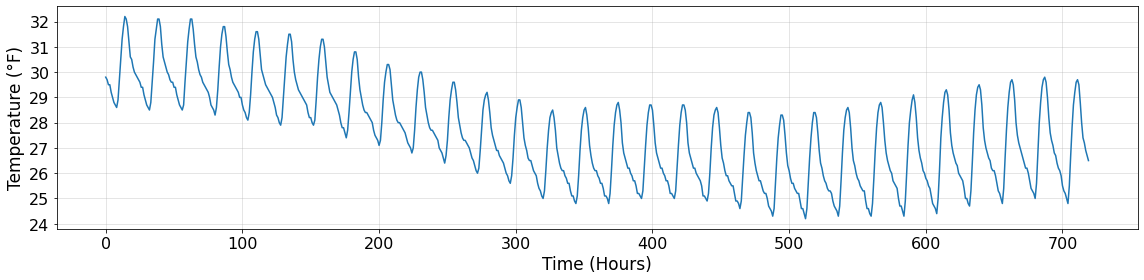

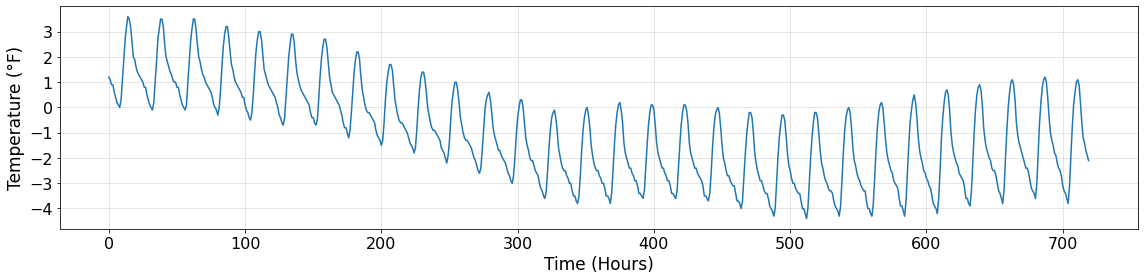

In [17]:
node_to_show = 78
start = 0000
end = 24*30

ax = plt.figure(figsize=(16, 4)).gca()
values = timeseries_data[node_to_show, :][start:end]
ax.plot(values)
plt.grid(alpha=0.4)
plt.xlabel("Time (Hours)", fontsize=17)
plt.ylabel("Temperature (°F)", fontsize=17)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("C:\\Users\\gabri\\Desktop\\NOAA_data_vis_raw.pdf")



values_for_norm = values[:int(0.5*len(values))]
values_norm = values - np.average(values_for_norm)

ax = plt.figure(figsize=(16, 4)).gca()
ax.plot(values_norm)
plt.grid(alpha=0.4)
plt.xlabel("Time (Hours)", fontsize=17)
plt.ylabel("Temperature (°F)", fontsize=17)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("C:\\Users\\gabri\\Desktop\\NOAA_data_vis_norm.pdf")

In [12]:
print(timeseries_data.shape)
print(differenced_timeseries_data.shape)
print(restored_timeseries_data.shape)

print("\n")

print(timeseries_data[0, 1:6])
print(differenced_timeseries_data[0, :5])
print(restored_timeseries_data[0, :5])

(109, 8759)
(109, 8758)
(109, 8758)


[56.3 56.  55.5 55.4 55.1]
[-0.2 -0.3 -0.5 -0.1 -0.3]
[56.3 56.  55.5 55.4 55.1]


# Distributions

In [18]:
n_samples = differenced_timeseries_data.shape[1]
trn_indices = range(int(splits[0]*n_samples))
val_indices = range(int(splits[0]*n_samples), int(sum(splits[:2]*n_samples)))
tst_indices = range(int(sum(splits[:2]*n_samples)), int(n_samples))

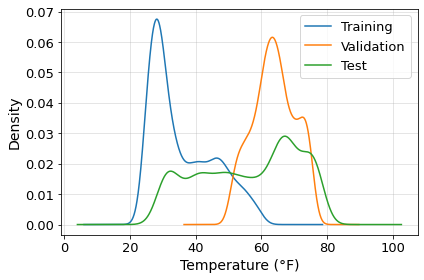

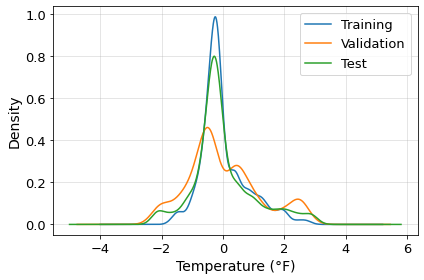

In [27]:
data_to_plot = timeseries_data[node_to_show, :]
pd.Series(data_to_plot[trn_indices]).plot(kind='kde', label="Training")
pd.Series(data_to_plot[val_indices]).plot(kind='kde', label="Validation")
pd.Series(data_to_plot[tst_indices]).plot(kind='kde', label="Test")

plt.legend(fontsize=13)
title = f"Node: {node_to_show} | Original data"
#plt.title(title)
plt.xlabel("Temperature (°F)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.grid(alpha=0.4)
plt.savefig("./NOAA_distribution_original.pdf")
plt.show()


data_to_plot = differenced_timeseries_data[node_to_show, :]
pd.Series(data_to_plot[trn_indices]).plot(kind='kde', label="Training")
pd.Series(data_to_plot[val_indices]).plot(kind='kde', label="Validation")
pd.Series(data_to_plot[tst_indices]).plot(kind='kde', label="Test")

plt.legend(fontsize=13)
title = f"Node: {node_to_show} | Original data"
#plt.title(title)
plt.xlabel("Temperature (°F)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.savefig("./NOAA_distribution_differenced.pdf")
plt.show()

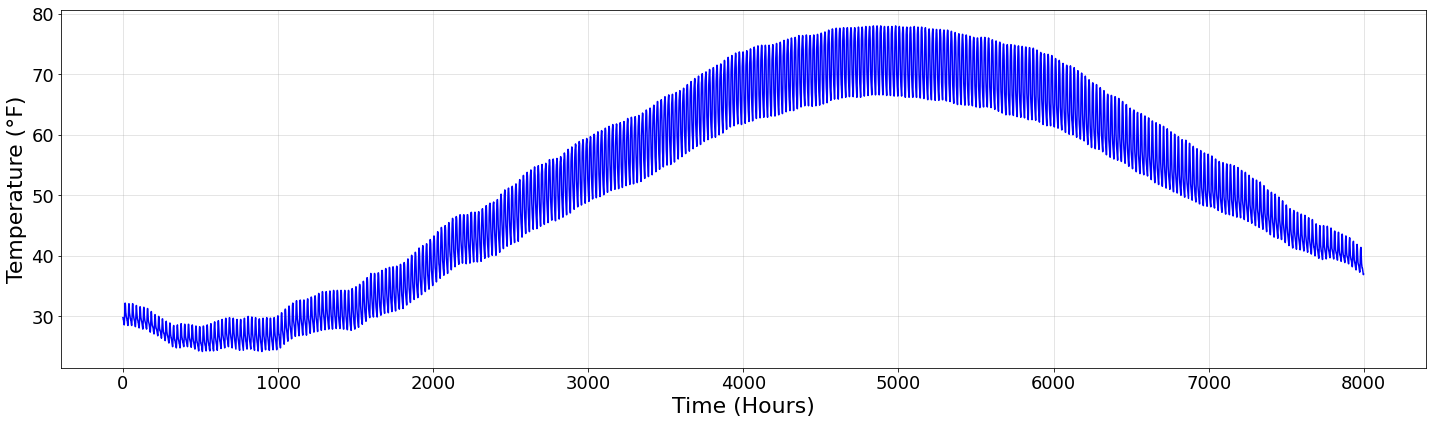

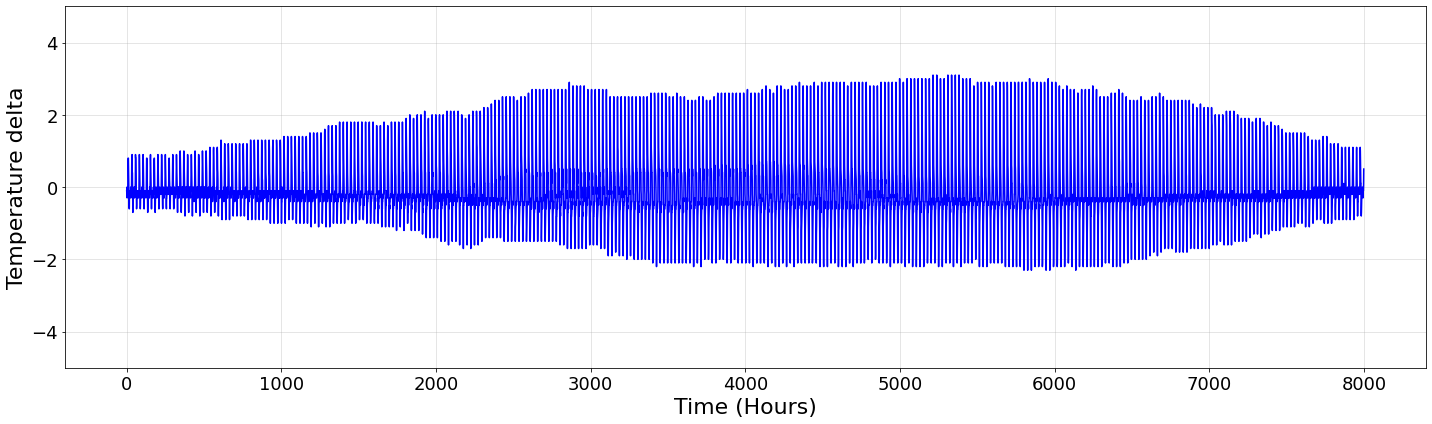

In [29]:
node_to_show = 78
start = 0000
end = 8000

indices = range(timeseries_data.shape[1])
plt.figure(figsize=(20, 6))
plt.plot(indices[start:end], timeseries_data[node_to_show, :][start:end], 'b')
#plt.axvline(x=int(len(indices)* splits[0]), c='g', linestyle='-')
#plt.axvline(x=int(len(indices)* sum(splits[:2])), c='g', linestyle='-')
#plt.title(f"Node {node_to_show} | Original data", fontsize=15)
plt.xlabel("Time (Hours)", fontsize=22)
plt.ylabel("Temperature (°F)", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig("./NOAA_year_data_original.pdf")
plt.show()


indices = range(differenced_timeseries_data.shape[1])
plt.figure(figsize=(20, 6))
plt.plot(indices[start:end], differenced_timeseries_data[node_to_show, :][start:end], 'b')

plt.xlabel("Time (Hours)", fontsize=22)
plt.ylabel("Temperature delta", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-5, 5)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig("./NOAA_year_data_differenced.pdf")
plt.show()

In [16]:
np.save(differenced_timeseries_results_path, arr=differenced_timeseries_data)

# Analysis on correlations

In [86]:
node_to_analyze = 8
neighbors_indices = [i for i, e in enumerate(weighted_adjacency[node_to_analyze].tolist()) if e != 0.0]

In [77]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [78]:
pd.Series(timeseries_data[node_to_analyze])

0       49.5
1       48.9
2       48.4
3       47.9
4       47.5
        ... 
8754    54.0
8755    52.6
8756    51.4
8757    50.7
8758    50.1
Length: 8759, dtype: float64

In [79]:
pd.Series(timeseries_data[neighbors_indices[0]])

0       55.1
1       54.6
2       54.2
3       53.7
4       53.4
        ... 
8754    59.0
8755    57.9
8756    56.9
8757    56.3
8758    55.8
Length: 8759, dtype: float64

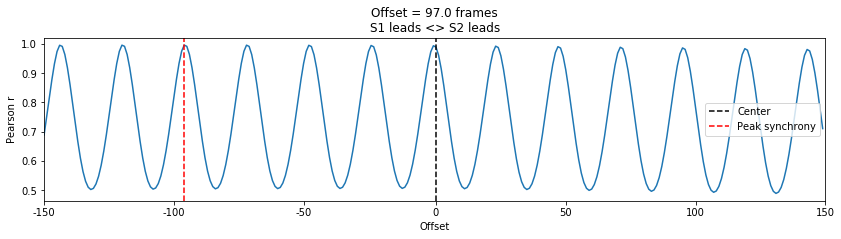

0.9957975847676904


54

In [116]:
d1 = pd.Series(timeseries_data[node_to_analyze])
d2 = pd.Series(timeseries_data[neighbors_indices[0]])
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

plt.show()
print(np.max(rs))
np.argmax(rs)

Let's check the same for the MOLENE

In [117]:
dataset_path_mol = r"C:\\Users\\gabri\\Desktop\\new_thesis_project\\prediction\\MOLENE\\dataset\\processed\\"
weighted_adjacency_path_mol = dataset_path + "weighted_adjacency.npy"
weighted_adjacency_mol = np.load(file=weighted_adjacency_path)

pickle_dataset_path = dataset_path_mol + f"dataset_w=4_steps=[1, 2, 3, 4, 5]_splits=[0.35, 0.15, 0.5].pickle"

print(f"\nDataset path: {pickle_dataset_path}")

with open(pickle_dataset_path, 'rb') as handle:
    molene_data = pickle.load(handle)['all'].transpose()
weighted_adjacency = np.load(file=weighted_adjacency_path)


Dataset path: C:\\Users\\gabri\\Desktop\\new_thesis_project\\prediction\\MOLENE\\dataset\\processed\\dataset_w=4_steps=[1, 2, 3, 4, 5]_splits=[0.35, 0.15, 0.5].pickle


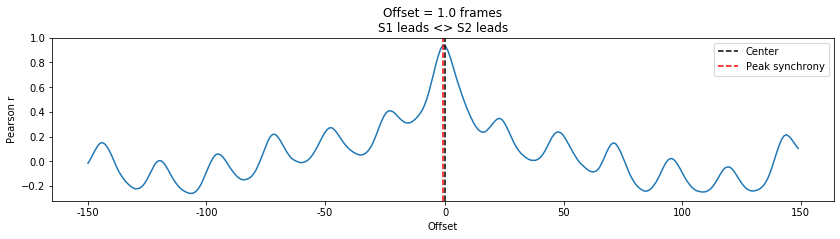

0.9406787792817477
150


In [119]:
node_to_analyze = 8
neighbors_indices = [i for i, e in enumerate(weighted_adjacency_mol[node_to_analyze].tolist()) if e != 0.0]

d1 = pd.Series(molene_data[node_to_analyze])
d2 = pd.Series(molene_data[neighbors_indices[0]])
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

plt.show()
print(np.max(rs))
print(np.argmax(rs))